In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import os
import seaborn as sns
import sklearn
assert sklearn.__version__ >= "0.20"
import pandas as pd

In [3]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Define the file path to the CSV file
# Change the path to match the location of your CSV file in Google Drive
csv_file_path = '//content/drive/MyDrive/Applied Machine Learning/happiness_data.csv'

# Step 3: Load the CSV file into a Pandas DataFrame
happiness= pd.read_csv(csv_file_path)

# Step 4: Display the first few rows to verify the data is loaded
happiness.head()


Mounted at /content/drive


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [ ]:
del happiness

#For Model Resetting

# A. Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical? [5 points]

In [4]:
happiness.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


The Happiness Dataset has a total of 1949 rows and 11 columns containing data on the happiness scores, Log GDP per capita, social support, health life expectancy, freedom to make life choices, generosity, perceptions of corruption, positive effect & negative affect of various countries from 2005 to 2013.

Almost all attributes are continuous valued except the country and year attributes which are categorical in nature.

# B. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require? [5 points]



# C. Analyze the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coeﬃcient (PCC) and generating scatter plots. [5 points]

In [ ]:
happiness.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


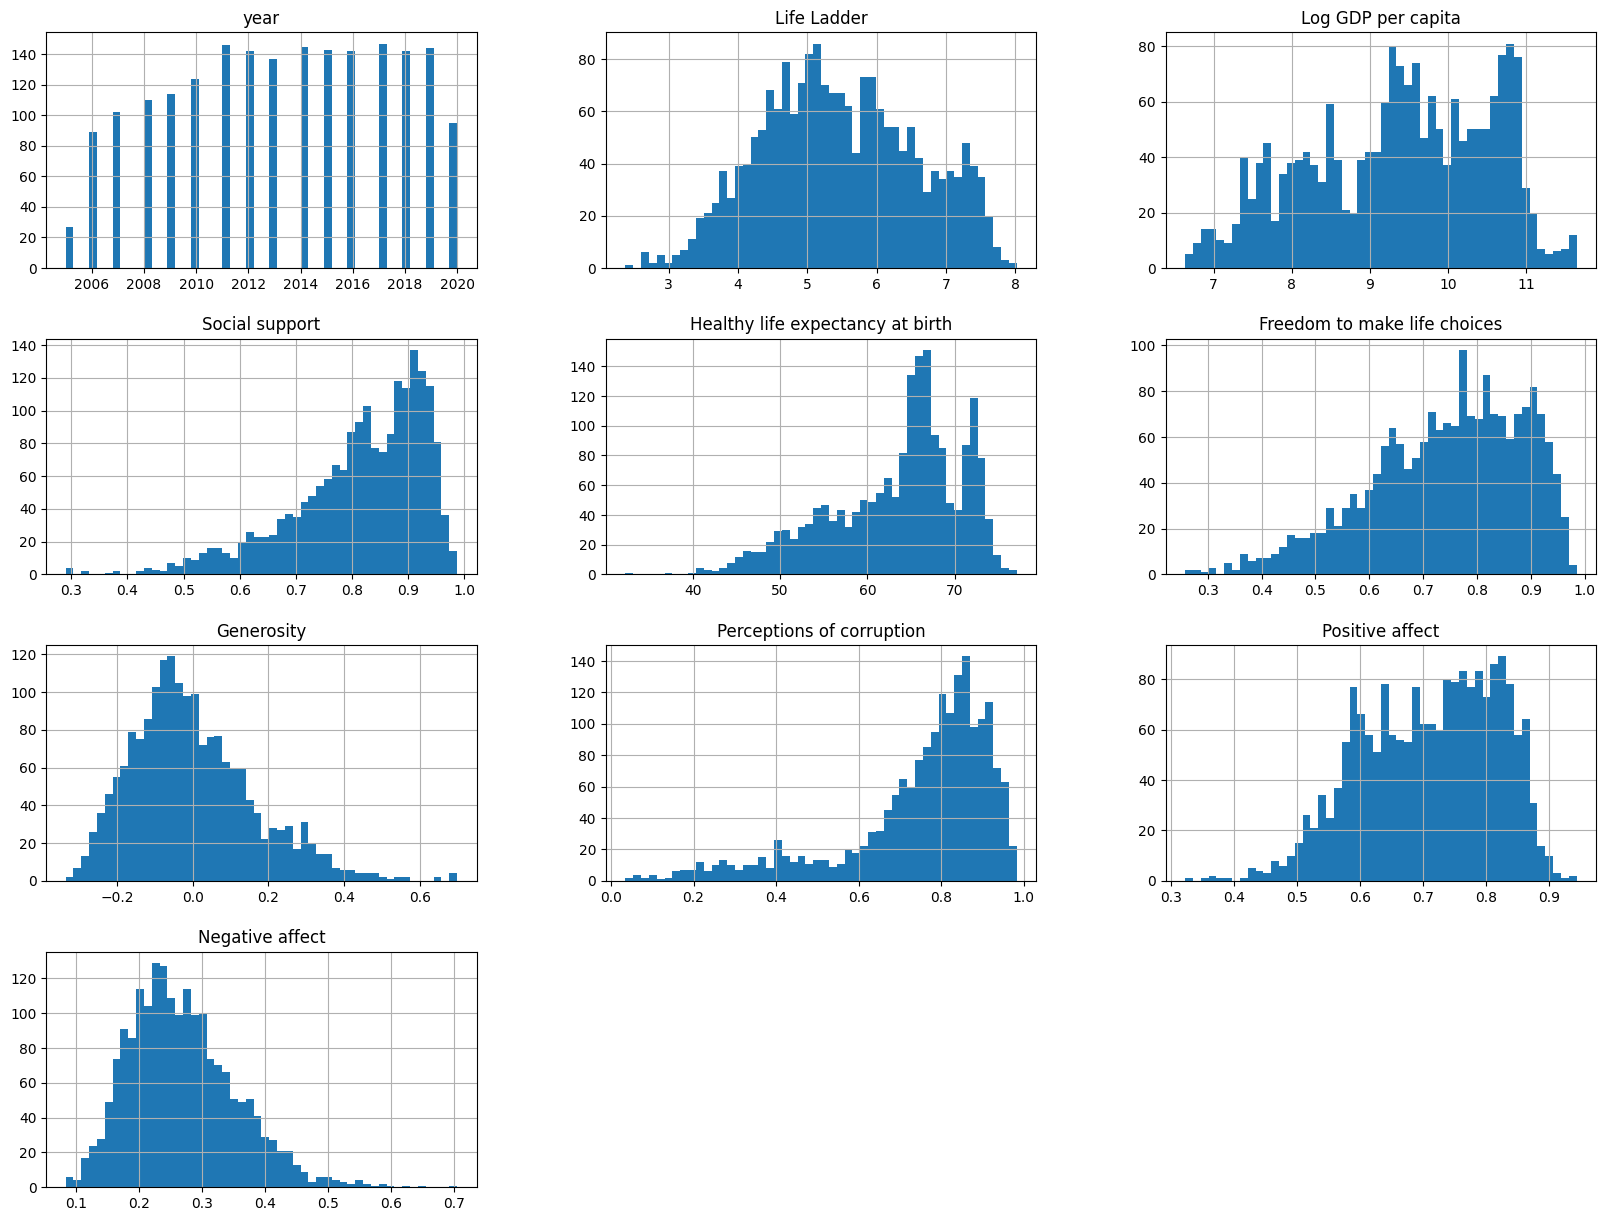

In [5]:
import matplotlib.pyplot as plt
happiness.hist(bins=50, figsize=(20,15))
plt.show()

From the Histograms it appears that Life Ladder, Generosity and Negative Affect has a distribution similar to a Normal Distribution. While Social Support, Health Life Expectancy at Birth, Freedom to Make Life Choices & Perception to Corruption are Left Skewed.

Additionally, some features have null values which will hinder in the calculation of regression models therefore we shall replace these null values with their median.

The country name requires special treatment and needs to be Ordinally Encoded

In [ ]:
corr_matrix = happiness.corr(numeric_only=True)
corr_matrix["Life Ladder"].sort_values(ascending=False)

,Life Ladder
Life Ladder,1.000000
Log GDP per capita,0.790166
Healthy life expectancy at birth,0.744506
Social support,0.707806
Positive affect,0.532273
Freedom to make life choices,0.528063
Generosity,0.190632
year,0.035515
Negative affect,-0.297488
Perceptions of corruption,-0.427245


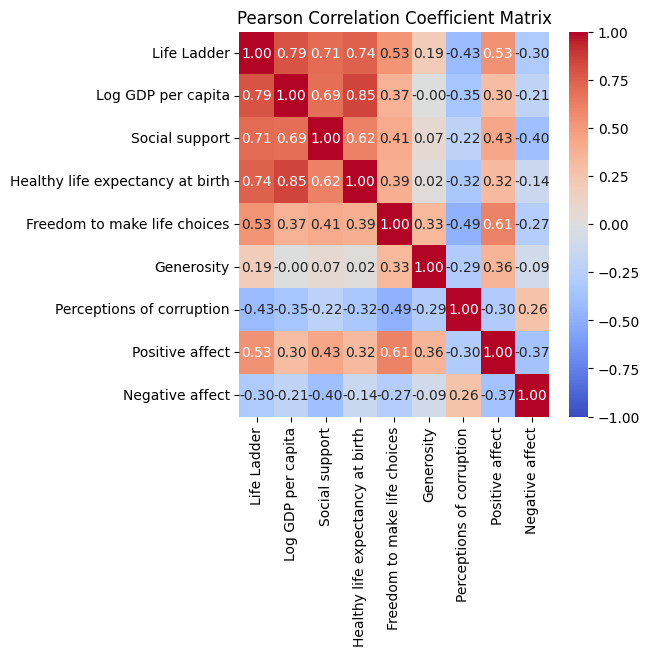

In [ ]:
# Drop non-numerical columns for correlation analysis
numerical_data = happiness.drop(['Country name', 'year'], axis=1)

# Compute the Pearson Correlation Coefficient matrix
corr_matrix = numerical_data.corr()

# Display the correlation matrix
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Pearson Correlation Coefficient Matrix')
plt.show()


Based on the Correlation Coefficient Table, there is a strong positive correlation of Life Ladder with Log GDP per capita, Social Support, Healthy life expenctancy at birth, freedom to make choices & positive effect.

On the other hand, there is negative correlation of Life Ladder with Perceptions of Corruptions and Negative Effect. Interestingly, there is a strong correlation of Log GDP per capita with Social Support and Life Expectancy at birth.

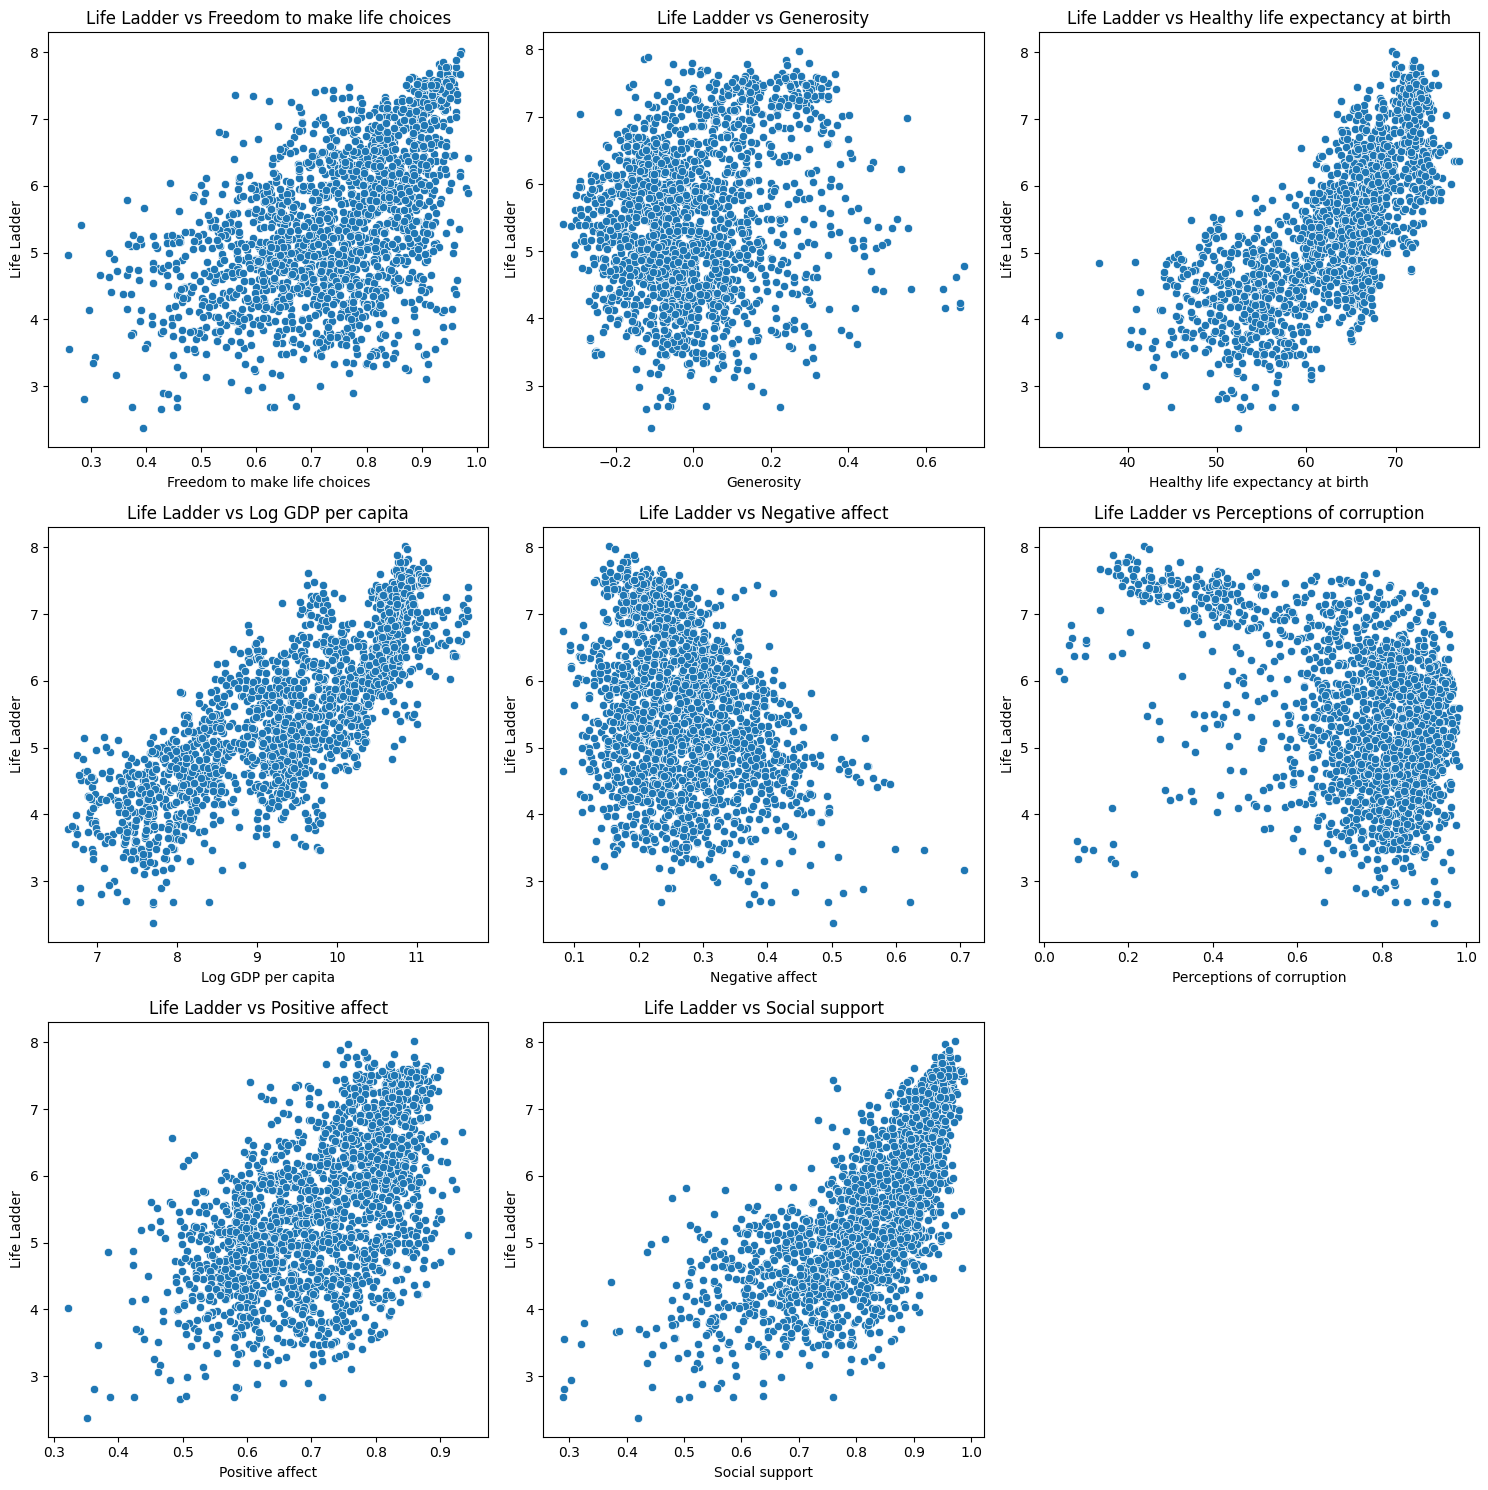

In [ ]:
# List of variables to compare with 'Life Ladder'
variables = happiness.columns.difference(['Life Ladder', 'Country name', 'year'])  # Exclude 'Life Ladder', 'Country name', and 'year'
num_vars = len(variables)

# Set up subplots: 3 plots per row
rows = (num_vars + 2) // 3  # Calculate the number of rows needed
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Adjust figure size

# Flatten axes for easy iteration if multiple rows
axes = axes.flatten()

# Create scatter plots for each variable
for i, var in enumerate(variables):
    sns.scatterplot(data=happiness, x=var, y='Life Ladder', ax=axes[i])
    axes[i].set_title(f'Life Ladder vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Life Ladder')

# Remove any empty subplots
for i in range(num_vars, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


#Data Cleaning: Replacing Null Values with Median

In [6]:
missing_values = happiness.isnull().sum()
missing_values

,0
Country name,0
year,0
Life Ladder,0
Log GDP per capita,36
Social support,13
Healthy life expectancy at birth,55
Freedom to make life choices,32
Generosity,89
Perceptions of corruption,110
Positive affect,22


In [7]:
# Calculate the median for all numeric columns, excluding 'Country name'
median = happiness.select_dtypes(include=[np.number]).median()

# Fill missing values in numeric columns with the median
happiness.fillna(median, inplace=True)

# The 'Country name' column will remain unchanged

In [8]:
missing_values = happiness.isnull().sum()
missing_values

,0
Country name,0
year,0
Life Ladder,0
Log GDP per capita,0
Social support,0
Healthy life expectancy at birth,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0
Positive affect,0


# D. Select 25% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset. [5 points]

In [9]:
# Necessary imports for data preprocessing pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Drop the target variable 'Life Ladder' from the dataset
happiness_X = happiness.drop('Life Ladder', axis=1)
y = happiness['Life Ladder']

# Select numerical and categorical columns
numerical_cols = happiness_X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = happiness_X.select_dtypes(include=['object']).columns

# Define the preprocessing pipeline for numerical features
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define the preprocessing pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine numerical and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

In [10]:
# Apply preprocessing to the dataset
X = preprocessor.fit_transform(happiness_X)

# Display the processed dataset
print(X)
print(y)


  (0, 0)	-1.2521148160235374
  (0, 1)	-1.7496874826399045
  (0, 2)	-3.063478570105103
  (0, 3)	-1.7024288541361217
  (0, 4)	-0.1766624200867331
  (0, 5)	1.0665553997301387
  (0, 6)	0.7247177656826278
  (0, 7)	-1.8045639600068322
  (0, 8)	-0.12331990317454594
  (0, 9)	1.0
  (1, 0)	-1.0120625067150668
  (1, 1)	-1.6009747289066993
  (1, 2)	-2.2080545757470693
  (1, 3)	-1.648431986073693
  (1, 4)	-0.4534373075120204
  (1, 5)	1.2053427865266617
  (1, 6)	0.5487324147371018
  (1, 7)	-1.1846923509095855
  (1, 8)	-0.3709580307886664
  (1, 9)	1.0
  (2, 0)	-0.7720101974065963
  (2, 1)	-1.507373172145211
  (2, 2)	-2.3181586542287964
  (2, 3)	-1.594435118011265
  (2, 4)	-1.0140838743478604
  :	:
  (1946, 5)	-0.42225474954165326
  (1946, 6)	0.5157351614348156
  (1946, 7)	-0.0013010971784771178
  (1946, 8)	-0.6657653255673809
  (1946, 174)	1.0
  (1947, 0)	1.3884605863696386
  (1947, 1)	-1.2423145581383805
  (1947, 2)	-0.4548588645380314
  (1947, 3)	-0.9734711352933417
  (1947, 4)	-0.7869865308194188


In [ ]:
X.shape

(1949, 175)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (1461, 175), X_test: (488, 175), y_train: (1461,), y_test: (488,)


In [12]:
# Calculate means of training and test data for features (X)
X_train_mean = X_train.mean()
X_test_mean = X_test.mean()

# Calculate means of training and test data for target (y)
y_train_mean = y_train.mean()
y_test_mean = y_test.mean()

# Display the means
print("Mean of X_train:")
print(X_train_mean)
print("\nMean of X_test:")
print(X_test_mean)

print("\nMean of y_train:")
print(y_train_mean)
print("\nMean of y_test:")
print(y_test_mean)


Mean of X_train:
0.005204573955299253

Mean of X_test:
0.007240287517317359

Mean of y_train:
5.457548254620123

Mean of y_test:
5.494120901639345


As it may be seen that the means of the Test and Training set are quite similar which means that our test set is indeed representative of the entire data set.

# E. Train a Linear Regression model using the training data with three-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try three values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration. [10 points]


In [13]:
# Linear Regression using the Normal Equation (Closed-form solution)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the linear regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Get the coefficients and intercept
coefficients = lin_reg.coef_
intercept = lin_reg.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Perform 3-fold cross-validation
linear_scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=3)
linear_rmse_scores = np.sqrt(-linear_scores)

# Function to display scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Display the results for the closed-form solution
print("Closed-form solution (Normal Equation) RMSE scores:")
display_scores(linear_rmse_scores)

Coefficients: [ 0.03384775  0.31760917  0.17077756 -0.15672365  0.10852707  0.03394555
 -0.06305168  0.16205206 -0.07333092 -0.73823368  0.06308829  0.40864674
 -0.49101024  0.57030553 -0.08067188  0.9749066   0.99794471 -0.23250288
  0.15969134  0.05552209  0.15903388  0.91232062  1.02888604 -0.46556892
 -0.8273088   0.39885224  0.28501186 -1.82444964  0.96055957 -0.8061125
 -0.59714361 -0.27592217 -0.89127557 -0.47233005  1.1072877  -0.66004891
 -0.49602278  0.64650309 -0.48765229  0.60862438 -0.86007522 -0.10945132
 -0.21903747  1.34775258  0.27049802  0.39296805  0.53160743  0.87408524
  1.19006861 -0.36449591 -0.54743411  0.28445943 -0.40273546  0.75463631
 -0.18102064 -0.50698716  1.26691683  0.76546419 -0.74024321 -0.0211784
 -0.41851775  0.63395088 -0.32778202  0.42796277  0.71790773 -0.74243241
  0.58595024 -0.67715101  0.21170769 -0.52665653 -0.27373843  1.01299266
 -0.30580425 -0.40869829 -0.01323039 -0.03685109  0.65495799  1.63413536
  0.82724888 -0.76652123  0.30118755  0

In [25]:
from sklearn.linear_model import SGDRegressor

# Perform 3-fold cross-validation for the SGD model
sgd_reg = SGDRegressor(max_iter=1000, tol=None, warm_start=True, penalty=None, learning_rate="constant", eta0=1e-03, random_state=42)

sgd_reg.fit(X_train, y_train)

# Get the coefficients and intercept
coefficients = sgd_reg.coef_
intercept = sgd_reg.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Perform cross-validation and calculate RMSE scores
sgd_scores = cross_val_score(sgd_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=3)
sgd_rmse_scores = np.sqrt(-sgd_scores)

# Display the RMSE scores for SGD
print("SGD Regression with 3-Fold Cross-Validation RMSE scores:")
display_scores(sgd_rmse_scores)


Coefficients: [ 0.0035032   0.45894636  0.18546878 -0.04110622  0.09677116  0.04194343
 -0.09135296  0.17031239 -0.06630902  1.76986927  2.09492043  2.44663016
  1.77948345  2.46893696  1.98142736  2.62885974  2.69025006  1.81827055
  1.97282905  2.32723112  2.16140215  2.63703742  2.03162965  2.01218362
  1.13124431  2.54759341  2.30972122  0.37047294  2.94594963  1.20298627
  1.910298    2.28287401  1.41797349  2.01408014  2.74115889  2.08331213
  2.11663573  2.50465323  1.53948226  2.60540038  1.51171406  2.28011435
  2.38065459  3.2364118   2.19064522  1.45863593  2.32508393  2.74565487
  2.8260398   1.93514084  1.46880082  2.28187386  1.74321083  2.83837421
  1.69240045  1.91807285  2.94850749  2.482199    1.44063749  2.10023092
  1.65461789  2.33364377  2.02804029  2.25622363  2.82505371  1.75408804
  1.81340767  1.88080326  2.32115472  1.26565222  1.65356907  2.70882489
  2.00007661  1.70707355  2.00597473  2.10984525  2.28687474  3.39393528
  2.57809287  1.7163595   2.35625211 

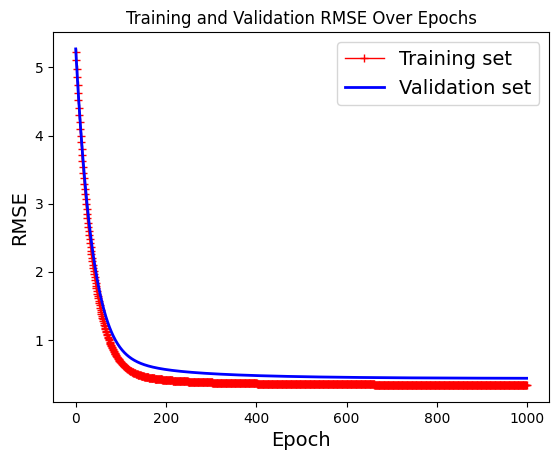

In [15]:
from sklearn.metrics import mean_squared_error

# Initialize the SGDRegressor
sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate="constant", eta0=1e-03, random_state=42)
sgd_reg.fit(X_train, y_train)
# Track training and validation errors over iterations (epochs)
train_errors, val_errors = [], []
n_epochs = 1000

for epoch in range(n_epochs):
    sgd_reg.fit(X_train, y_train)
    y_train_predict = sgd_reg.predict(X_train)
    y_val_predict = sgd_reg.predict(X_test)

    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_test, y_val_predict))

# Plot training and validation loss
plt.plot(np.sqrt(train_errors), "r-+", linewidth=1, label="Training set")
plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title("Training and Validation RMSE Over Epochs")
plt.show()


The plot above shows the training and validation RMSE descrease sharply at the start and rapidly approach a stable value close to 0.5 after just a few epochs.

Stabalization: This means that the models quickly learned the underlying patterns in the data and reached a point after which is does not improve.

Observation on Overfitting: Since training and validation RMSR are almost identical it means that overfitting is not an issue in the model and it generalizes in good way on unseen data.

Next, I will implement Ridge, Lasso, and Elastic Net regularization with three different penalty values each, and describe the impact of the regularization.

In [70]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Try three different penalty values for Ridge, Lasso, and Elastic Net
alphas = [0.01, 0.1, 1.0]

# Ridge Regression (L2 Regularization)
print("Ridge Regression (L2 Regularization)")
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha, random_state=42)
    ridge_scores = cross_val_score(ridge_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=3)
    ridge_rmse_scores = np.sqrt(-ridge_scores)
    print(f"Alpha = {alpha}")
    display_scores(ridge_rmse_scores)

# Lasso Regression (L1 Regularization)
print("\nLasso Regression (L1 Regularization)")
for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha, random_state=42)
    lasso_scores = cross_val_score(lasso_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=3)
    lasso_rmse_scores = np.sqrt(-lasso_scores)
    print(f"Alpha = {alpha}")
    display_scores(lasso_rmse_scores)

# Elastic Net (Combination of L1 and L2)
print("\nElastic Net (Combination of L1 and L2 Regularization)")
for alpha in alphas:
    elastic_net_reg = ElasticNet(alpha=alpha, l1_ratio=0.5, random_state=42)
    elastic_net_scores = cross_val_score(elastic_net_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=3)
    elastic_net_rmse_scores = np.sqrt(-elastic_net_scores)
    print(f"Alpha = {alpha}")
    display_scores(elastic_net_rmse_scores)


ridge_reg = Ridge(alpha=0.01)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

elastic_net_reg = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net_reg.fit(X_train, y_train)


Ridge Regression (L2 Regularization)
Alpha = 0.01
Scores: [0.39402679 0.41073428 0.38487228]
Mean: 0.39654444893504676
Standard deviation: 0.010707153710688444
Alpha = 0.1
Scores: [0.38834638 0.41024982 0.38346144]
Mean: 0.3940192129083486
Standard deviation: 0.01164874956112285
Alpha = 1.0
Scores: [0.39222753 0.40936556 0.38164486]
Mean: 0.3944126520690787
Standard deviation: 0.01142192085050143

Lasso Regression (L1 Regularization)
Alpha = 0.01
Scores: [0.54172406 0.56549106 0.53595168]
Mean: 0.5477222686850624
Standard deviation: 0.012783520347984434
Alpha = 0.1
Scores: [0.56619359 0.5853673  0.55710384]
Mean: 0.5695549098374771
Standard deviation: 0.011780766368134991
Alpha = 1.0
Scores: [1.1289673  1.13482821 1.09016017]
Mean: 1.1179852283629332
Standard deviation: 0.019820241460952456

Elastic Net (Combination of L1 and L2 Regularization)
Alpha = 0.01
Scores: [0.52875104 0.5479258  0.52158432]
Mean: 0.5327537197489861
Standard deviation: 0.011120083020366961
Alpha = 0.1
Scores: [

ElasticNet(alpha=0.01)

Findings

Regularization Results:
1. Ridge Regression (L2 Regularization):
- Alpha = 0.01: Mean RMSE = 0.397
- Alpha = 0.1: Mean RMSE = 0.394
- Alpha = 1.0: Mean RMSE = 0.394

Ridge Regression consistently performs the best with relatively low RMSE values and minimal change across different alpha values. It is the most stable method of regularization in this case, effectively preventing overfitting without causing underfitting.

2. Lasso Regression (L1 Regularization):
- Alpha = 0.01: Mean RMSE = 0.547
- Alpha = 0.1: Mean RMSE = 0.570
- Alpha = 1.0: Mean RMSE = 1.118

Lasso Regression shows good performance at low alpha values but quickly deteriorates as alpha increases. This behavior reflects Lasso’s tendency to aggressively shrink coefficients to zero, leading to underfitting when the regularization is too strong (as seen with alpha = 1.0).

3. Elastic Net (Combination of L1 and L2):
- Alpha = 0.01: Mean RMSE = 0.533
- Alpha = 0.1: Mean RMSE = 0.557
- Alpha = 1.0: Mean RMSE = 0.882

Elastic Net strikes a balance between Ridge and Lasso. It performs comparably to Ridge at lower alpha values but worsens with higher alphas due to the combined regularization effects. The results show that Elastic Net should be tuned carefully to find the optimal balance between L1 and L2 regularization.

In [17]:
# Exploring different learning rates for SGD
learning_rates = [1e-05, 1e-04, 1e-03, 1e-02,1e-01]

print("Exploring different learning rates for SGD:")
for lr in learning_rates:
    sgd_reg = SGDRegressor(max_iter=1000, tol=None,warm_start=True, penalty=None, learning_rate="constant", eta0=lr, random_state=42)
    sgd_scores = cross_val_score(sgd_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=3)
    sgd_rmse_scores = np.sqrt(-sgd_scores)
    print(f"Learning rate = {lr}")
    display_scores(sgd_rmse_scores)




Exploring different learning rates for SGD:
Learning rate = 1e-05
Scores: [4.72698836 4.77311514 4.71853641]
Mean: 4.739546637474498
Standard deviation: 0.02398599723886241
Learning rate = 0.0001
Scores: [1.37744569 1.43274211 1.34803844]
Mean: 1.3860754156967197
Standard deviation: 0.03511440286959484
Learning rate = 0.001
Scores: [0.52643265 0.42987569 0.43232933]
Mean: 0.46287922097954626
Standard deviation: 0.04495022074220844
Learning rate = 0.01
Scores: [0.50493404 0.43334171 0.43339004]
Mean: 0.45722192864466993
Standard deviation: 0.03373756281920144
Learning rate = 0.1
Scores: [0.53520778 0.60852767 0.6535461 ]
Mean: 0.5990938485494203
Standard deviation: 0.048769781122729644


### Results of Different Learning Rates:

- **Learning rate = 1e-05**: Mean RMSE = **4.740**
- **Learning rate = 1e-04**: Mean RMSE = **1.386**
- **Learning rate = 1e-03**: Mean RMSE = **0.463**
- **Learning rate = 1e-02**: Mean RMSE = **0.457**
- **Learning rate = 1e-01**: Mean RMSE = **0.600**

Summary of Findings:

The best performance was achieved with a learning rate between 0.001 and 0.01, where the RMSE is low and the model is stable.

A too-small learning rate (1e-05) leads to very slow learning, causing the model to perform poorly.

A too-high learning rate (0.1) causes the model to overshoot, resulting in higher RMSE and unstable results.

A learning rate of 0.001 appears to provide the most balanced and optimal performance, allowing the model to learn effectively while maintaining stability.


Simulating mini-batch SGD with smaller chunks of data:


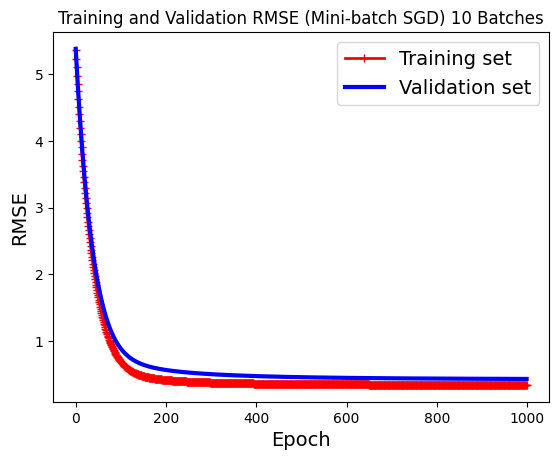

In [19]:
# Simulating mini-batch SGD (batch size approximation)
print("\nSimulating mini-batch SGD with smaller chunks of data:")

# Use partial_fit for simulating batch sizes
n_batches = 10 # Split into batches
batch_size = X_train.shape[0] // n_batches
n_epochs = 1000

# Initialize the model
sgd_reg_batch = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty='l2', learning_rate="constant", eta0=1e-03, random_state=42)

train_errors_batch, val_errors_batch = [], []

# Simulate the training with mini-batches over epochs
for epoch in range(n_epochs):
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        X_batch = X_train[start_idx:end_idx]
        y_batch = y_train[start_idx:end_idx]
        sgd_reg_batch.partial_fit(X_batch, y_batch)

    y_train_predict_batch = sgd_reg_batch.predict(X_train)
    y_val_predict_batch = sgd_reg_batch.predict(X_test)
    train_errors_batch.append(mean_squared_error(y_train, y_train_predict_batch))
    val_errors_batch.append(mean_squared_error(y_test, y_val_predict_batch))

# Plotting the training and validation loss for mini-batch SGD
plt.plot(np.sqrt(train_errors_batch), "r-+", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors_batch), "b-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title("Training and Validation RMSE (Mini-batch SGD) 10 Batches")
plt.show()



Simulating mini-batch SGD with smaller chunks of data:


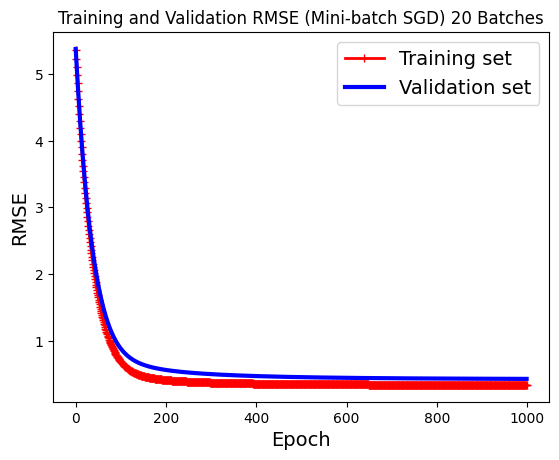

In [21]:
# Simulating mini-batch SGD (batch size approximation)
print("\nSimulating mini-batch SGD with smaller chunks of data:")

# Use partial_fit for simulating batch sizes
n_batches = 20 # Split into batches
batch_size = X_train.shape[0] // n_batches
n_epochs = 1000

# Initialize the model
sgd_reg_batch = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty='l2', learning_rate="constant", eta0=1e-03, random_state=42)

train_errors_batch, val_errors_batch = [], []

# Simulate the training with mini-batches over epochs
for epoch in range(n_epochs):
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        X_batch = X_train[start_idx:end_idx]
        y_batch = y_train[start_idx:end_idx]
        sgd_reg_batch.partial_fit(X_batch, y_batch)

    y_train_predict_batch = sgd_reg_batch.predict(X_train)
    y_val_predict_batch = sgd_reg_batch.predict(X_test)
    train_errors_batch.append(mean_squared_error(y_train, y_train_predict_batch))
    val_errors_batch.append(mean_squared_error(y_test, y_val_predict_batch))

# Plotting the training and validation loss for mini-batch SGD
plt.plot(np.sqrt(train_errors_batch), "r-+", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors_batch), "b-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title("Training and Validation RMSE (Mini-batch SGD) 20 Batches")
plt.show()



Simulating mini-batch SGD with smaller chunks of data:


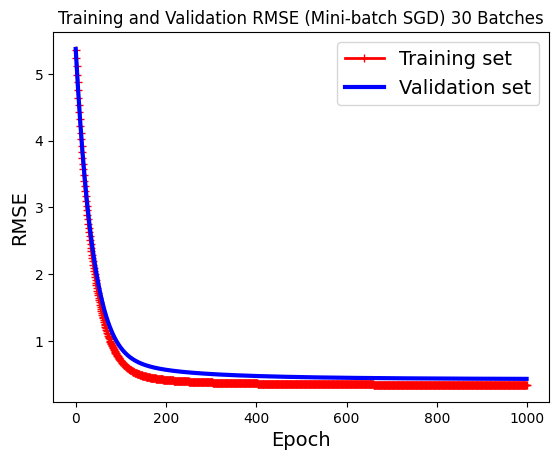

In [22]:
# Simulating mini-batch SGD (batch size approximation)
print("\nSimulating mini-batch SGD with smaller chunks of data:")

# Use partial_fit for simulating batch sizes
n_batches = 30 # Split into batches
batch_size = X_train.shape[0] // n_batches
n_epochs = 1000

# Initialize the model
sgd_reg_batch = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty='l2', learning_rate="constant", eta0=1e-03, random_state=42)

train_errors_batch, val_errors_batch = [], []

# Simulate the training with mini-batches over epochs
for epoch in range(n_epochs):
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        X_batch = X_train[start_idx:end_idx]
        y_batch = y_train[start_idx:end_idx]
        sgd_reg_batch.partial_fit(X_batch, y_batch)

    y_train_predict_batch = sgd_reg_batch.predict(X_train)
    y_val_predict_batch = sgd_reg_batch.predict(X_test)
    train_errors_batch.append(mean_squared_error(y_train, y_train_predict_batch))
    val_errors_batch.append(mean_squared_error(y_test, y_val_predict_batch))

# Plotting the training and validation loss for mini-batch SGD
plt.plot(np.sqrt(train_errors_batch), "r-+", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors_batch), "b-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title("Training and Validation RMSE (Mini-batch SGD) 30 Batches")
plt.show()


Mini-batch SGD:

The mini-batch approach simulates smaller batch sizes by splitting the training data into 10,20 and 30 batches. We will prefer to use 32 batches for a balance between speed, memory efficiency and generalization

The training and validation RMSE are plotted above. Mini-batch training helps smooth the training process by updating weights more frequently compared to full-batch updates.

Convergence: Both the training and validation RMSE steadily decrease and appear to converge after about 200-300 epochs. This suggests that the model is learning well and both the training and validation errors are stabilizing over time.

No Overfitting: The training and validation curves are close together, which is a good sign. If the validation curve were much higher than the training curve, it would indicate overfitting. Here, the model is generalizing well to the validation set.

Diminishing Returns: After around 200-300 epochs, the improvement in RMSE is minimal, indicating that the model has almost fully converged. Running for more epochs might not provide significant benefits.

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Function to compute and display RMSE and R-squared for each model
def evaluate_model(model_name, y_train, y_train_pred, y_test, y_test_pred):
    # RMSE for training set
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

    # RMSE for test set
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # R-squared for training set
    r2_train = r2_score(y_train, y_train_pred)

    # R-squared for test set
    r2_test = r2_score(y_test, y_test_pred)

    print(f"\nModel: {model_name}")
    print(f"Training RMSE: {rmse_train}, Test RMSE: {rmse_test}")
    print(f"Training R-squared: {r2_train}, Test R-squared: {r2_test}")

# Evaluate each model

# 1. Linear Regression (Normal Equation)
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)
evaluate_model("Linear Regression (Normal Equation)", y_train, y_train_pred, y_test, y_test_pred)

# 2. Linear Regression (SGD)
y_train_pred_sgd = sgd_reg.predict(X_train)
y_test_pred_sgd = sgd_reg.predict(X_test)
evaluate_model("Linear Regression (SGD)", y_train, y_train_pred_sgd, y_test, y_test_pred_sgd)

# 3. Ridge Regression
y_train_pred_ridge = ridge_reg.predict(X_train)
y_test_pred_ridge = ridge_reg.predict(X_test)
evaluate_model("Ridge Regression", y_train, y_train_pred_ridge, y_test, y_test_pred_ridge)

# 4. Lasso Regression
y_train_pred_lasso = lasso_reg.predict(X_train)
y_test_pred_lasso = lasso_reg.predict(X_test)
evaluate_model("Lasso Regression", y_train, y_train_pred_lasso, y_test, y_test_pred_lasso)

# 5. Elastic Net Regression
y_train_pred_elastic_net = elastic_net_reg.predict(X_train)
y_test_pred_elastic_net = elastic_net_reg.predict(X_test)
evaluate_model("Elastic Net Regression", y_train, y_train_pred_elastic_net, y_test, y_test_pred_elastic_net)

# 6. SGD with Mini-Batch
y_train_pred_sgd_batch = sgd_reg_batch.predict(X_train)
y_test_pred_sgd_batch = sgd_reg_batch.predict(X_test)
evaluate_model("SGD with Mini-Batch", y_train, y_train_pred_sgd_batch, y_test, y_test_pred_sgd_batch)





Model: Linear Regression (Normal Equation)
Training RMSE: 0.33296406988975963, Test RMSE: 0.40665689679823885
Training R-squared: 0.911118047648852, Test R-squared: 0.8659576707227361

Model: Linear Regression (SGD)
Training RMSE: 0.3386743538222808, Test RMSE: 0.4360938177951155
Training R-squared: 0.9080432815804179, Test R-squared: 0.8458492856490354

Model: Ridge Regression
Training RMSE: 0.3330146345481534, Test RMSE: 0.4057643149294037
Training R-squared: 0.9110910499802113, Test R-squared: 0.8665454509822507

Model: Lasso Regression
Training RMSE: 0.5457220169358118, Test RMSE: 0.5430369021714884
Training R-squared: 0.7612398769702307, Test R-squared: 0.7609744270402858

Model: Elastic Net Regression
Training RMSE: 0.5224370936901452, Test RMSE: 0.5235906708266763
Training R-squared: 0.7811800812243406, Test R-squared: 0.777786990474959

Model: SGD with Mini-Batch
Training RMSE: 0.339630972680539, Test RMSE: 0.4302743094069629
Training R-squared: 0.9075230664153792, Test R-squa


Description of Models:

In this project, we employed Linear regression (Normal Equation) to model relationship between the features and the target. Normal Equation (Closed-form solution) achieves a mean Training RMSE of 0.332.

To optimize the model, we used Stochastic Gradient Descent (SGD), which updates the model parameters incrementally based on mini-batches of data. This approach allowed the model to converge efficiently, even with large datasets, by performing frequent weight updates. The Training RMSE of this model was 0.338.

The plot above shows the training and validation RMSE descrease sharply at the start and rapidly approach a stable value close to 0.5 after just a few epochs.

Stabalization: This means that the models quickly learned the underlying patterns in the data and reached a point after which is does not improve.

Observation on Overfitting: Since training and validation RMSR are almost identical it means that overfitting is not an issue in the model and it generalizes in good way on unseen data.

Regularization Techniques:

Ridge Regression shows consistent performance across different alpha values and is not heavily affected by regularization.

Lasso Regression shows increasing RMSE with higher alpha, suggesting that strong L1 regularization leads to underfitting.

Elastic Net performs similarly to Lasso but with even worse performance at high alpha values due to the combined regularization effect of L1 and L2 penalties.

Hyperparameters and Model Behavior:

The best performance was achieved with a learning rate between 0.001 and 0.01, where the RMSE is low and the model is stable.

A too-small learning rate (1e-05) leads to very slow learning, causing the model to perform poorly.

A too-high learning rate (0.1) causes the model to overshoot, resulting in higher RMSE and unstable results.

A learning rate of 0.001 appears to provide the most balanced and optimal performance, allowing the model to learn effectively while maintaining stability.

 The optimal learning rate (1e-5 or 1e-4) balanced rapid convergence and model stability. Mini-batch size was set to 32, dividing the data into smaller chunks. This allowed for convergence as compared to full-batch training.

The model was trained over 1000 epochs, and we observed that RMSE on both the training and validation sets dropped significantly and stabilized after the first few epochs, indicating that the model was learning effectively


# F. Repeat everything from part E with polynomial regression and using SGD. Using validation loss, explore if your model overfits/underfits the data. [10 points]

In [58]:
from sklearn.preprocessing import PolynomialFeatures


# Polynomial Feature Transformation (degree 2 for quadratic regression)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [59]:
# Polynomial Regression using the Normal Equation (Closed-form solution)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the Polinomial regression model
poly_reg = LinearRegression()

# Train the model
poly_reg.fit(X_train_poly, y_train)

# Get the coefficients and intercept
coefficients = poly_reg.coef_
intercept = poly_reg.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Perform 3-fold cross-validation
linear_scores = cross_val_score(poly_reg, X_train_poly, y_train, scoring="neg_mean_squared_error", cv=3)
linear_rmse_scores = np.sqrt(-linear_scores)

# Function to display scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Display the results for the closed-form solution
print("Closed-form solution (Normal Equation) RMSE scores:")
display_scores(linear_rmse_scores)

Coefficients: [-9.40790975e-11  5.88782213e-03  7.84013741e-01 ... -1.11190514e+01
  0.00000000e+00  3.40928925e+00]
Intercept: 3.6084695758344667
Closed-form solution (Normal Equation) RMSE scores:
Scores: [1.37072337 1.69248725 1.24752589]
Mean: 1.436912170801606
Standard deviation: 0.1875870837611223


In [60]:
# Perform 3-fold cross-validation for the SGD Polynomial model
sgd_reg_poly = SGDRegressor(max_iter=1000, tol=None, warm_start=True, penalty=None, learning_rate="constant", eta0=1e-4, random_state=42)

sgd_reg_poly.fit(X_train_poly, y_train)

# Get the coefficients and intercept
coefficients = sgd_reg_poly.coef_
intercept = sgd_reg_poly.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Perform cross-validation and calculate RMSE scores
sgd_scores = cross_val_score(sgd_reg_poly, X_train_poly, y_train, scoring="neg_mean_squared_error", cv=3)
sgd_rmse_scores = np.sqrt(-sgd_scores)

# Display the RMSE scores for SGD
print("SGD Regression with 3-Fold Cross-Validation RMSE scores:")
display_scores(sgd_rmse_scores)

Coefficients: [ 4.937295   -0.04822893  0.32506027 ...  0.04135054  0.
 -0.08153321]
Intercept: [0.04937295]
SGD Regression with 3-Fold Cross-Validation RMSE scores:
Scores: [0.35359289 0.40667415 0.37613408]
Mean: 0.37880037242973313
Standard deviation: 0.02175219602284662


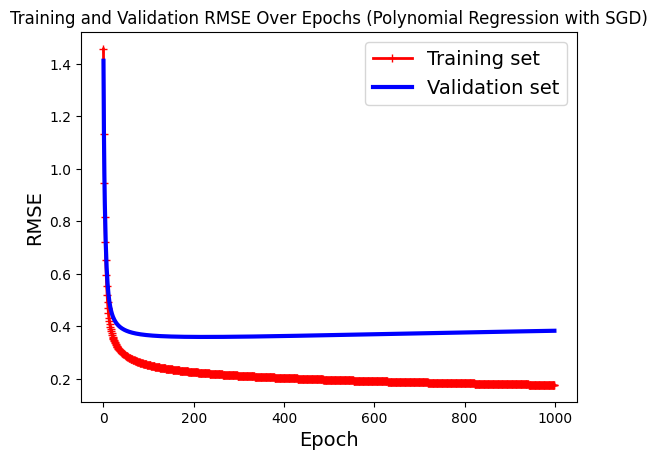

In [61]:
sgd_reg_poly = SGDRegressor(max_iter=1, tol= None, warm_start=True, penalty=None, learning_rate="constant", eta0=1e-3, random_state=42)

train_errors, val_errors = [], []
n_epochs = 1000  # Number of iterations/epochs

for epoch in range(n_epochs):
    sgd_reg_poly.fit(X_train_poly, y_train)  # Fit the model to the training set
    y_train_predict = sgd_reg_poly.predict(X_train_poly)  # Predict on the training set
    y_val_predict = sgd_reg_poly.predict(X_test_poly)  # Predict on the test set

    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_test, y_val_predict))

plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title("Training and Validation RMSE Over Epochs (Polynomial Regression with SGD)")
plt.show()

The plot above shows the training and validation RMSE over 1000 epochs for the SGD model. Ideally, the training and validation curves should converge as the model learns over time. However, the curves are not converging.

Overfitting:

The most prominent issue in this graph is overfitting. The training error becomes very small while the validation error remains significantly higher, which shows that the model is overly complex for the data and is capturing noise in the training set rather than generalizable patterns.

Lack of Generalization:
Since the validation RMSE is much higher than the training RMSE, the model struggles to generalize to the validation set, which means it may not perform well on unseen data.


Next, I will implement Ridge, Lasso, and Elastic Net regularization with three different penalty values each, and describe the impact of the regularization.

In [62]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Try three different penalty values for Ridge, Lasso, and Elastic Net
alphas = [0.01, 0.1, 1.0]

# Ridge Regression (L2 Regularization)
print("Ridge Regression (L2 Regularization)")
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha, random_state=42)
    ridge_scores = cross_val_score(ridge_reg, X_train_poly, y_train, scoring="neg_mean_squared_error", cv=3)
    ridge_rmse_scores = np.sqrt(-ridge_scores)
    print(f"Alpha = {alpha}")
    display_scores(ridge_rmse_scores)

# Lasso Regression (L1 Regularization)
print("\nLasso Regression (L1 Regularization)")
for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha, random_state=42)
    lasso_scores = cross_val_score(lasso_reg, X_train_poly, y_train, scoring="neg_mean_squared_error", cv=3)
    lasso_rmse_scores = np.sqrt(-lasso_scores)
    print(f"Alpha = {alpha}")
    display_scores(lasso_rmse_scores)

# Elastic Net (Combination of L1 and L2)
print("\nElastic Net (Combination of L1 and L2 Regularization)")
for alpha in alphas:
    elastic_net_reg = ElasticNet(alpha=alpha, l1_ratio=0.5, random_state=42)
    elastic_net_scores = cross_val_score(elastic_net_reg, X_train_poly, y_train, scoring="neg_mean_squared_error", cv=3)
    elastic_net_rmse_scores = np.sqrt(-elastic_net_scores)
    print(f"Alpha = {alpha}")
    display_scores(elastic_net_rmse_scores)


ridge_reg_poly = Ridge(alpha=1)
ridge_reg_poly.fit(X_train_poly, y_train)

lasso_reg_poly = Lasso(alpha=0.01)
lasso_reg_poly.fit(X_train_poly, y_train)

elastic_net_reg_poly = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net_reg_poly.fit(X_train_poly, y_train)

Ridge Regression (L2 Regularization)
Alpha = 0.01
Scores: [0.66625654 0.61771225 0.59737989]
Mean: 0.6271162266292394
Standard deviation: 0.028894343370786463
Alpha = 0.1
Scores: [0.48189708 0.43543551 0.46299753]
Mean: 0.46011003834960484
Standard deviation: 0.019077432614180826
Alpha = 1.0
Scores: [0.36183232 0.37183805 0.37608516]
Mean: 0.369918509316672
Standard deviation: 0.005974908674102923

Lasso Regression (L1 Regularization)
Alpha = 0.01
Scores: [0.49365036 0.53408744 0.49633613]
Mean: 0.5080246445647314
Standard deviation: 0.018461769042302997
Alpha = 0.1
Scores: [0.55358363 0.57923446 0.54403052]
Mean: 0.5589495383799218
Standard deviation: 0.014864367344483537
Alpha = 1.0
Scores: [1.1289673  1.13482821 1.09016017]
Mean: 1.1179852283629332
Standard deviation: 0.019820241460952456

Elastic Net (Combination of L1 and L2 Regularization)
Alpha = 0.01
Scores: [0.47385386 0.50380458 0.47674777]
Mean: 0.484802072123172
Standard deviation: 0.013488642253364555
Alpha = 0.1
Scores: [

ElasticNet(alpha=0.01)

Ridge Regression performs best with higher alpha values, as it efficiently reduces RMSE and prevents overfitting.

Lasso Regression performs well at lower alpha values, but over-penalizes and underfits at higher alpha values.

Elastic Net provides a balance but shows a similar pattern to Lasso, especially at higher alpha values, where underfitting occurs.

In [63]:
# Exploring different learning rates for SGD
learning_rates = [1e-06,1e-05, 1e-04, 1e-03, 1e-02,1e-01]

print("Exploring different learning rates for SGD:")
for lr in learning_rates:
    sgd_reg_poly_lr = SGDRegressor(max_iter=1000, tol=None,warm_start=True, penalty=None, learning_rate="constant", eta0=lr, random_state=42)
    sgd_scores = cross_val_score(sgd_reg_poly_lr, X_train_poly, y_train, scoring="neg_mean_squared_error", cv=3)
    sgd_rmse_scores = np.sqrt(-sgd_scores)
    print(f"Learning rate = {lr}")
    display_scores(sgd_rmse_scores)

Exploring different learning rates for SGD:
Learning rate = 1e-06
Scores: [1.64799461 1.65574485 1.7496146 ]
Mean: 1.6844513539117287
Standard deviation: 0.04618587921554293
Learning rate = 1e-05
Scores: [0.72948991 0.69085176 0.7706642 ]
Mean: 0.7303352907364523
Standard deviation: 0.03258877511706808
Learning rate = 0.0001
Scores: [0.35359289 0.40667415 0.37613408]
Mean: 0.37880037242973313
Standard deviation: 0.02175219602284662
Learning rate = 0.001
Scores: [0.39036306 0.38389342 0.39553414]
Mean: 0.38993020938975603
Standard deviation: 0.004762150821291582
Learning rate = 0.01
Scores: [4.05577728e+11 3.21153700e+11 3.10218252e+11]
Mean: 345649893283.2617
Standard deviation: 42609897109.18685
Learning rate = 0.1
Scores: [4.76424609e+12 8.55056314e+12 7.12856201e+12]
Mean: 6814457080460.047
Standard deviation: 1561632828183.8857


### Results of Different Learning Rates:

- **Learning rate = 1e-06**: Mean RMSE = **1.684**
- **Learning rate = 1e-05**: Mean RMSE = **0.730**
- **Learning rate = 1e-04**: Mean RMSE = **0.379**
- **Learning rate = 1e-03**: Mean RMSE = **0.390**
- **Learning rate = 1e-02**: Mean RMSE = **345649893283**
- **Learning rate = 1e-01**: Mean RMSE = **6814457080460**

Optimal learning rates appear to be between 1e-05 and 1e-3, with 1e-4 showing the best balance of low RMSE and stability.

Too small learning rates (e.g., 1e-06) lead to slow learning and poor convergence.

Too high learning rates (e.g., 0.01 and 0.1) cause the model to diverge and overshoot the optimal solution, resulting in extremely high RMSE values


Simulating mini-batch SGD with smaller chunks of data:


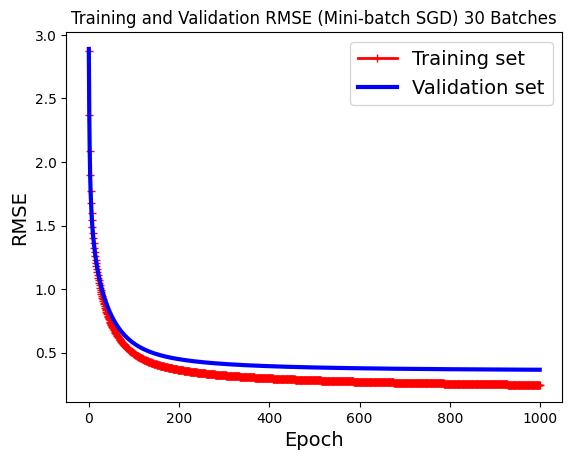

In [65]:
# Simulating mini-batch SGD (batch size approximation)
print("\nSimulating mini-batch SGD with smaller chunks of data:")

# Use partial_fit for simulating batch sizes
n_batches = 30 # Split into batches
batch_size = X_train_poly.shape[0] // n_batches
n_epochs = 1000

# Initialize the model
sgd_reg_batch_poly = SGDRegressor(max_iter=10, tol=None, warm_start=True, penalty='l2', learning_rate="constant", eta0=1e-04, random_state=42)

train_errors_batch, val_errors_batch = [], []

# Simulate the training with mini-batches over epochs
for epoch in range(n_epochs):
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        X_batch = X_train_poly[start_idx:end_idx]
        y_batch = y_train[start_idx:end_idx]
        sgd_reg_batch_poly.partial_fit(X_batch, y_batch)

    y_train_predict_batch = sgd_reg_batch_poly.predict(X_train_poly)
    y_val_predict_batch = sgd_reg_batch_poly.predict(X_test_poly)
    train_errors_batch.append(mean_squared_error(y_train, y_train_predict_batch))
    val_errors_batch.append(mean_squared_error(y_test, y_val_predict_batch))

# Plotting the training and validation loss for mini-batch SGD
plt.plot(np.sqrt(train_errors_batch), "r-+", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors_batch), "b-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title("Training and Validation RMSE (Mini-batch SGD) 30 Batches")
plt.show()



Simulating mini-batch SGD with smaller chunks of data:


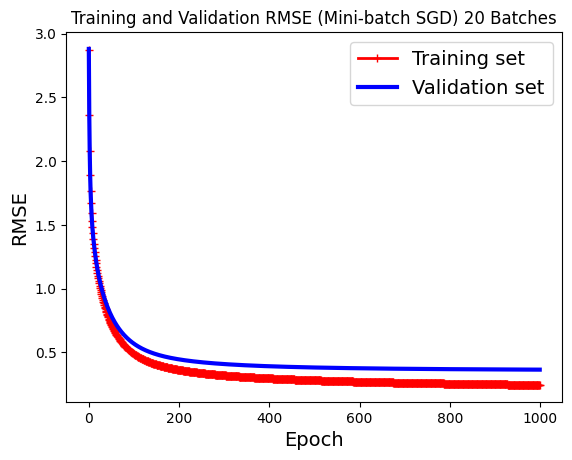

In [66]:
# Simulating mini-batch SGD (batch size approximation)
print("\nSimulating mini-batch SGD with smaller chunks of data:")

# Use partial_fit for simulating batch sizes
n_batches = 20 # Split into batches
batch_size = X_train_poly.shape[0] // n_batches
n_epochs = 1000

# Initialize the model
sgd_reg_batch_poly = SGDRegressor(max_iter=10, tol=None, warm_start=True, penalty='l2', learning_rate="constant", eta0=1e-04, random_state=42)

train_errors_batch, val_errors_batch = [], []

# Simulate the training with mini-batches over epochs
for epoch in range(n_epochs):
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        X_batch = X_train_poly[start_idx:end_idx]
        y_batch = y_train[start_idx:end_idx]
        sgd_reg_batch_poly.partial_fit(X_batch, y_batch)

    y_train_predict_batch = sgd_reg_batch_poly.predict(X_train_poly)
    y_val_predict_batch = sgd_reg_batch_poly.predict(X_test_poly)
    train_errors_batch.append(mean_squared_error(y_train, y_train_predict_batch))
    val_errors_batch.append(mean_squared_error(y_test, y_val_predict_batch))

# Plotting the training and validation loss for mini-batch SGD
plt.plot(np.sqrt(train_errors_batch), "r-+", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors_batch), "b-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title("Training and Validation RMSE (Mini-batch SGD) 20 Batches")
plt.show()



Simulating mini-batch SGD with smaller chunks of data:


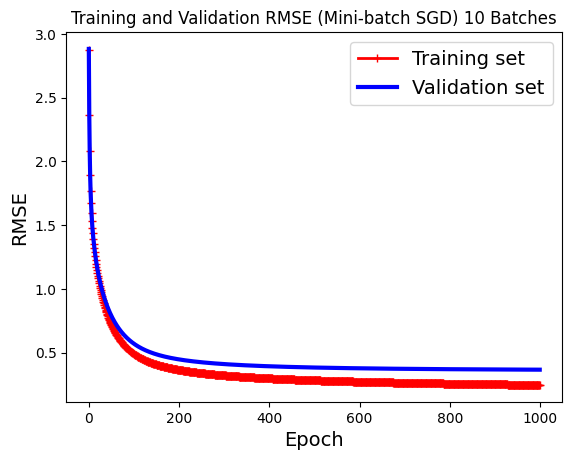

In [67]:
# Simulating mini-batch SGD (batch size approximation)
print("\nSimulating mini-batch SGD with smaller chunks of data:")

# Use partial_fit for simulating batch sizes
n_batches = 10 # Split into batches
batch_size = X_train_poly.shape[0] // n_batches
n_epochs = 1000

# Initialize the model
sgd_reg_batch_poly = SGDRegressor(max_iter=10, tol=None, warm_start=True, penalty='l2', learning_rate="constant", eta0=1e-04, random_state=42)

train_errors_batch, val_errors_batch = [], []

# Simulate the training with mini-batches over epochs
for epoch in range(n_epochs):
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        X_batch = X_train_poly[start_idx:end_idx]
        y_batch = y_train[start_idx:end_idx]
        sgd_reg_batch_poly.partial_fit(X_batch, y_batch)

    y_train_predict_batch = sgd_reg_batch_poly.predict(X_train_poly)
    y_val_predict_batch = sgd_reg_batch_poly.predict(X_test_poly)
    train_errors_batch.append(mean_squared_error(y_train, y_train_predict_batch))
    val_errors_batch.append(mean_squared_error(y_test, y_val_predict_batch))

# Plotting the training and validation loss for mini-batch SGD
plt.plot(np.sqrt(train_errors_batch), "r-+", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors_batch), "b-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title("Training and Validation RMSE (Mini-batch SGD) 10 Batches")
plt.show()


The mini-batch approach simulates smaller batch sizes by splitting the training data into 10,20 and 30 batches. We will prefer to use 32 batches for a balance between speed, memory efficiency and generalization The training and validation RMSE are plotted above. Mini-batch training helps smooth the training process by updating weights more frequently compared to full-batch updates. Furthermore, in the the mini-batch the training and validation RMSE decrease at gradual rate as compared to SGD Full batch where the decrerase in RSME was sudden.

Why Mini-Batch is better Model:

Better Generalization: In (Mini-batch SGD), the training and validation RMSE values are close to each other, indicating that the model is generalizing well. The small gap between the two curves means the model is not overfitting and is likely to perform better on unseen test data.

Overfitting in Graph 2: In Standard SGD, there is a large gap between the training and validation curves, which is a sign of overfitting. The model is too complex and fits the noise in the training data, which leads to poor performance on the validation set.

Stability of Learning: Graph 2 shows a smoother, more gradual convergence, which is generally a sign of a stable model. In contrast, Graph 1 shows a much steeper decline in the training RMSE, indicating the model might be too aggressive in fitting the training data.

In [68]:
#Model Descriptions

from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Function to compute and display RMSE and R-squared for each model
def evaluate_model(model_name, y_train, y_train_pred, y_test, y_test_pred):
    # RMSE for training set
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

    # RMSE for test set
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # R-squared for training set
    r2_train = r2_score(y_train, y_train_pred)

    # R-squared for test set
    r2_test = r2_score(y_test, y_test_pred)

    print(f"\nModel: {model_name}")
    print(f"Training RMSE: {rmse_train}, Test RMSE: {rmse_test}")
    print(f"Training R-squared: {r2_train}, Test R-squared: {r2_test}")

# Evaluate each model


# 7. Polynomial Regression (Normal Equation)
y_train_pred_poly = poly_reg.predict(X_train_poly)
y_test_pred_poly = poly_reg.predict(X_test_poly)
evaluate_model("Polynomial Regression (Normal Equation)", y_train, y_train_pred_poly, y_test, y_test_pred_poly)

# 8. Polynomial Regression (SGD)
y_train_pred_sgd_poly = sgd_reg_poly.predict(X_train_poly)
y_test_pred_sgd_poly = sgd_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Regression (SGD)", y_train, y_train_pred_sgd_poly, y_test, y_test_pred_sgd_poly)

# 9. Polynomial Ridge Regression
y_train_pred_ridge_poly = ridge_reg_poly.predict(X_train_poly)
y_test_pred_ridge_poly = ridge_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Ridge Regression", y_train, y_train_pred_ridge_poly, y_test, y_test_pred_ridge_poly)

# 10. Polynomial Lasso Regression
y_train_pred_lasso_poly = lasso_reg_poly.predict(X_train_poly)
y_test_pred_lasso_poly = lasso_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Lasso Regression", y_train, y_train_pred_lasso_poly, y_test, y_test_pred_lasso_poly)

# 11. Polynomial Elastic Net Regression
y_train_pred_elastic_net_poly = elastic_net_reg_poly.predict(X_train_poly)
y_test_pred_elastic_net_poly = elastic_net_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Elastic Net Regression", y_train, y_train_pred_elastic_net_poly, y_test, y_test_pred_elastic_net_poly)

# 12. Polynomial SGD with Mini-Batch
y_train_pred_sgd_batch_poly = sgd_reg_batch_poly.predict(X_train_poly)
y_test_pred_sgd_batch_poly = sgd_reg_batch_poly.predict(X_test_poly)
evaluate_model("Polynomial SGD with Mini-Batch", y_train, y_train_pred_sgd_batch_poly, y_test, y_test_pred_sgd_batch_poly)



Model: Polynomial Regression (Normal Equation)
Training RMSE: 0.05215406875788014, Test RMSE: 2.747506438896438
Training R-squared: 0.9978193034660501, Test R-squared: -5.118755779498722

Model: Polynomial Regression (SGD)
Training RMSE: 0.1768936468500791, Test RMSE: 0.38323545662695035
Training R-squared: 0.9749133128541713, Test R-squared: 0.880953386048978

Model: Polynomial Ridge Regression
Training RMSE: 0.1794819961389684, Test RMSE: 0.36183617053589334
Training R-squared: 0.9741737931684084, Test R-squared: 0.8938769707050176

Model: Polynomial Lasso Regression
Training RMSE: 0.4939099221613664, Test RMSE: 0.5036052297333498
Training R-squared: 0.804424547180254, Test R-squared: 0.7944269665296055

Model: Polynomial Elastic Net Regression
Training RMSE: 0.4572275333698222, Test RMSE: 0.4747659710546411
Training R-squared: 0.8323963035443563, Test R-squared: 0.8172973493663298

Model: Polynomial SGD with Mini-Batch
Training RMSE: 0.24558583115264337, Test RMSE: 0.36524466534625

Description of Models:

Polynomial Regression (Normal Equation):

In this model, we applied Polynomial Regression using the Normal Equation to capture non-linear relationships between the features and the target. By generating polynomial features (e.g., degree-2 polynomials), we allow the model to learn more complex patterns that cannot be captured by simple linear regression. The Normal Equation is a closed-form solution that computes the optimal coefficients without needing an iterative optimization algorithm like gradient descent.
The mean Training RSME is 0.052.

Model: Polynomial Regression with SGD:
This model applies polynomial regression to capture non-linear relationships between the features and the target. By transforming the input features into polynomial terms (e.g., degree-2 polynomials), the model becomes capable of capturing more complex patterns that are not possible with standard linear regression.The mean Training RSME is 0.176

The plot above shows the training and validation RMSE over 1000 epochs for the SGD model. Ideally, the training and validation curves should converge as the model learns over time. However, the curves are not converging.

Overfitting:

The most prominent issue in this graph is overfitting. The training error becomes very small while the validation error remains significantly higher, which shows that the model is overly complex for the data and is capturing noise in the training set rather than generalizable patterns.

Lack of Generalization: Since the validation RMSE is much higher than the training RMSE, the model struggles to generalize to the validation set, which means it may not perform well on unseen data.

Regularization Techniques:

To prevent overfitting and improve generalization, we implemented three types of regularization:
Ridge Regression (L2 Regularization): This penalizes large coefficients and helps reduce model complexity by shrinking the parameters. It was particularly useful in cases where multicollinearity existed between features.
Lasso Regression (L1 Regularization): Lasso not only shrinks the coefficients but can drive some of them to exactly zero, effectively performing feature selection.
Elastic Net: This combines both L1 and L2 regularization, balancing the advantages of Ridge and Lasso. It is useful when we expect some features to be irrelevant (sparse solutions) while also controlling for large coefficients.

Ridge is the most stable regularization method across different penalty values.

Lasso aggressively shrinks coefficients to zero, which can lead to underfitting when alpha is too high.

Elastic Net balances the effects of Ridge and Lasso, but high penalty values result in a significant increase in error.

Hyperparameters and Model Behavior:

We experimented with various learning rates, ranging from 1e-5 to 1e-1 to control the speed of convergence. Optimal learning rates appear to be between 1e-05 and 1e-3, with 1e-4 showing the best balance of low RMSE and stability.
Mini-batch size was set to 32, dividing the data into smaller chunks. This allowed for a smooth convergence as compared to full-batch training where the convergence was sudden.

The model was trained over 1000 epochs, and we observed that RMSE on both the training and validation sets dropped significantly and stabilized after the first few epochs, indicating that the model was learning effectively.

# G. Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance. [10 points]

1. Prediction on Test Data (5 points):

Linear Regression

In [ ]:
#Prediction on Linear Regression (Normal Equation)

# Make predictions on the training set
y_train_pred = lin_reg.predict(X_train)

# Make predictions on the testing set
y_test_pred = lin_reg.predict(X_test)

comparison_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred[:5]
})

print(comparison_df)


   Actual  Predicted
0   6.502   6.243568
1   6.201   5.912716
2   4.573   4.921970
3   5.786   5.867732
4   7.025   7.236497


In [ ]:
# Prediction on Linear Regression (SGD)
y_train_pred_sgd = sgd_reg.predict(X_train)

# Make predictions on the testing set
y_test_pred_sgd = sgd_reg.predict(X_test)

comparison_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_sgd[:5]
})

print(comparison_df)

   Actual  Predicted
0   6.502   6.109299
1   6.201   5.932028
2   4.573   4.926352
3   5.786   5.852833
4   7.025   7.173643


In [ ]:
#Prediction on Ridge Regression

# Make predictions on the training set
y_train_pred_ridge = ridge_reg.predict(X_train)

# Make predictions on the testing set
y_test_pred_ridge = ridge_reg.predict(X_test)

# Create a DataFrame to compare actual vs predicted values for the first 5 samples
comparison_ridge_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_ridge[:5]
})

print("Ridge Regression Predictions:")
print(comparison_ridge_df)

Ridge Regression Predictions:
   Actual  Predicted
0   6.502   6.225513
1   6.201   5.913354
2   4.573   4.921857
3   5.786   5.867332
4   7.025   7.226903


In [ ]:
#Prediction on Lasso Regression

# Make predictions on the training set
y_train_pred_lasso = lasso_reg.predict(X_train)

# Make predictions on the testing set
y_test_pred_lasso = lasso_reg.predict(X_test)

# Create a DataFrame to compare actual vs predicted values for the first 5 samples
comparison_lasso_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_lasso[:5]
})

print("Lasso Regression Predictions:")
print(comparison_lasso_df)

Lasso Regression Predictions:
   Actual  Predicted
0   6.502   6.326649
1   6.201   6.057921
2   4.573   4.981765
3   5.786   6.051003
4   7.025   6.853624


In [ ]:
#Prediction on Elastic Regression

# Make predictions on the training set
y_train_pred_elastic_net = elastic_net_reg.predict(X_train)

# Make predictions on the testing set
y_test_pred_elastic_net = elastic_net_reg.predict(X_test)

# Create a DataFrame to compare actual vs predicted values for the first 5 samples
comparison_elastic_net_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_elastic_net[:5]
})

print("Elastic Net Regression Predictions:")
print(comparison_elastic_net_df)

Elastic Net Regression Predictions:
   Actual  Predicted
0   6.502   6.317547
1   6.201   6.062237
2   4.573   4.970624
3   5.786   6.051925
4   7.025   6.856882


In [ ]:
#Prediction using SGD Mini-Batch
y_train_pred_sgd_batch = sgd_reg_batch.predict(X_train)

# Make predictions on the testing set
y_test_pred_sgd_batch = sgd_reg_batch.predict(X_test)

# Create a DataFrame to compare actual vs predicted values for the first 5 samples
comparison_sgd_batch_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_sgd_batch[:5]
})

print("SGD with Mini-Batch Predictions:")
print(comparison_sgd_batch_df)

SGD with Mini-Batch Predictions:
   Actual  Predicted
0   6.502   6.098581
1   6.201   5.931980
2   4.573   4.916170
3   5.786   5.853822
4   7.025   7.166736


In [48]:
#Predictions from Polynomial Model REgression

# Make predictions on the training set
y_train_pred_poly = poly_reg.predict(X_train_poly)

# Make predictions on the testing set
y_test_pred_poly = poly_reg.predict(X_test_poly)

comparison_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_poly[:5]
})

print(comparison_df)

   Actual  Predicted
0   6.502   6.589664
1   6.201   6.410223
2   4.573   4.412197
3   5.786   6.231261
4   7.025   7.786562


In [ ]:
# Prediction on Linear Regression (SGD)
y_train_pred_sgd = sgd_reg_poly.predict(X_train_poly)

# Make predictions on the testing set
y_test_pred_sgd = sgd_reg_poly.predict(X_test_poly)

comparison_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_sgd[:5]
})

print(comparison_df)

   Actual  Predicted
0   6.502   6.408062
1   6.201   5.915253
2   4.573   4.960073
3   5.786   5.705762
4   7.025   7.216321


In [ ]:
#Prediction from Ridge Regression:

y_train_pred_ridge_poly = ridge_reg_poly.predict(X_train_poly)

# Make predictions on the testing set
y_test_pred_ridge_poly = ridge_reg_poly.predict(X_test_poly)

# Create a DataFrame to compare actual vs predicted values for the first 5 samples
comparison_ridge_poly_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_ridge_poly[:5]
})

print("Ridge Regression (Polynomial Features) Predictions:")
print(comparison_ridge_poly_df)

Ridge Regression (Polynomial Features) Predictions:
   Actual  Predicted
0   6.502   6.456453
1   6.201   6.150175
2   4.573   4.821920
3   5.786   6.144718
4   7.025   7.464580


In [ ]:
#Prediction from Lasso Regression

y_train_pred_lasso_poly = lasso_reg_poly.predict(X_train_poly)

# Make predictions on the testing set
y_test_pred_lasso_poly = lasso_reg_poly.predict(X_test_poly)

# Create a DataFrame to compare actual vs predicted values for the first 5 samples
comparison_lasso_poly_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_lasso_poly[:5]
})

print("Lasso Regression (Polynomial Features) Predictions:")
print(comparison_lasso_poly_df)

Lasso Regression (Polynomial Features) Predictions:
   Actual  Predicted
0   6.502   6.614386
1   6.201   6.115195
2   4.573   4.850852
3   5.786   5.950076
4   7.025   7.150933


In [ ]:
#Prediction from Elastic Net Regression

y_train_pred_elastic_net_poly = elastic_net_reg_poly.predict(X_train_poly)

# Make predictions on the testing set
y_test_pred_elastic_net_poly = elastic_net_reg_poly.predict(X_test_poly)

# Create a DataFrame to compare actual vs predicted values for the first 5 samples
comparison_elastic_net_poly_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_elastic_net_poly[:5]
})

print("Elastic Net Regression (Polynomial Features) Predictions:")
print(comparison_elastic_net_poly_df)

Elastic Net Regression (Polynomial Features) Predictions:
   Actual  Predicted
0   6.502   6.660921
1   6.201   6.127580
2   4.573   4.856805
3   5.786   5.970839
4   7.025   7.172820


In [ ]:
#Prediction using SGD Mini-Batch
y_train_pred_sgd_batch_poly = sgd_reg_batch_poly.predict(X_train_poly)

# Make predictions on the testing set
y_test_pred_sgd_batch_poly = sgd_reg_batch_poly.predict(X_test_poly)

# Create a DataFrame to compare actual vs predicted values for the first 5 samples
comparison_sgd_batch_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_sgd_batch_poly[:5]
})

print("SGD with Mini-Batch Predictions:")
print(comparison_sgd_batch_df)

SGD with Mini-Batch Predictions:
   Actual  Predicted
0   6.502   6.406251
1   6.201   5.913292
2   4.573   4.922598
3   5.786   5.695931
4   7.025   7.221867


Reporting the Evaluation Metric:

We shall check the model effectiveness based on the lowest RSME Score and Highest R Sqaure Value.

In [71]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Function to compute and display RMSE and R-squared for each model
def evaluate_model(model_name, y_train, y_train_pred, y_test, y_test_pred):
    # RMSE for training set
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

    # RMSE for test set
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # R-squared for training set
    r2_train = r2_score(y_train, y_train_pred)

    # R-squared for test set
    r2_test = r2_score(y_test, y_test_pred)

    print(f"\nModel: {model_name}")
    print(f"Training RMSE: {rmse_train}, Test RMSE: {rmse_test}")
    print(f"Training R-squared: {r2_train}, Test R-squared: {r2_test}")

# Evaluate each model

# 1. Linear Regression (Normal Equation)
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)
evaluate_model("Linear Regression (Normal Equation)", y_train, y_train_pred, y_test, y_test_pred)

# 2. Linear Regression (SGD)
y_train_pred_sgd = sgd_reg.predict(X_train)
y_test_pred_sgd = sgd_reg.predict(X_test)
evaluate_model("Linear Regression (SGD)", y_train, y_train_pred_sgd, y_test, y_test_pred_sgd)

# 3. Ridge Regression
y_train_pred_ridge = ridge_reg.predict(X_train)
y_test_pred_ridge = ridge_reg.predict(X_test)
evaluate_model("Ridge Regression", y_train, y_train_pred_ridge, y_test, y_test_pred_ridge)

# 4. Lasso Regression
y_train_pred_lasso = lasso_reg.predict(X_train)
y_test_pred_lasso = lasso_reg.predict(X_test)
evaluate_model("Lasso Regression", y_train, y_train_pred_lasso, y_test, y_test_pred_lasso)

# 5. Elastic Net Regression
y_train_pred_elastic_net = elastic_net_reg.predict(X_train)
y_test_pred_elastic_net = elastic_net_reg.predict(X_test)
evaluate_model("Elastic Net Regression", y_train, y_train_pred_elastic_net, y_test, y_test_pred_elastic_net)

# 6. SGD with Mini-Batch
y_train_pred_sgd_batch = sgd_reg_batch.predict(X_train)
y_test_pred_sgd_batch = sgd_reg_batch.predict(X_test)
evaluate_model("SGD with Mini-Batch", y_train, y_train_pred_sgd_batch, y_test, y_test_pred_sgd_batch)

# 7. Polynomial Regression (Normal Equation)
y_train_pred_poly = poly_reg.predict(X_train_poly)
y_test_pred_poly = poly_reg.predict(X_test_poly)
evaluate_model("Polynomial Regression (Normal Equation)", y_train, y_train_pred_poly, y_test, y_test_pred_poly)

# 8. Polynomial Regression (SGD)
y_train_pred_sgd_poly = sgd_reg_poly.predict(X_train_poly)
y_test_pred_sgd_poly = sgd_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Regression (SGD)", y_train, y_train_pred_sgd_poly, y_test, y_test_pred_sgd_poly)

# 9. Polynomial Ridge Regression
y_train_pred_ridge_poly = ridge_reg_poly.predict(X_train_poly)
y_test_pred_ridge_poly = ridge_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Ridge Regression", y_train, y_train_pred_ridge_poly, y_test, y_test_pred_ridge_poly)

# 10. Polynomial Lasso Regression
y_train_pred_lasso_poly = lasso_reg_poly.predict(X_train_poly)
y_test_pred_lasso_poly = lasso_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Lasso Regression", y_train, y_train_pred_lasso_poly, y_test, y_test_pred_lasso_poly)

# 11. Polynomial Elastic Net Regression
y_train_pred_elastic_net_poly = elastic_net_reg_poly.predict(X_train_poly)
y_test_pred_elastic_net_poly = elastic_net_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Elastic Net Regression", y_train, y_train_pred_elastic_net_poly, y_test, y_test_pred_elastic_net_poly)

# 12. Polynomial SGD with Mini-Batch
y_train_pred_sgd_batch_poly = sgd_reg_batch_poly.predict(X_train_poly)
y_test_pred_sgd_batch_poly = sgd_reg_batch_poly.predict(X_test_poly)
evaluate_model("Polynomial SGD with Mini-Batch", y_train, y_train_pred_sgd_batch_poly, y_test, y_test_pred_sgd_batch_poly)



Model: Linear Regression (Normal Equation)
Training RMSE: 0.33296406988975963, Test RMSE: 0.40665689679823885
Training R-squared: 0.911118047648852, Test R-squared: 0.8659576707227361

Model: Linear Regression (SGD)
Training RMSE: 0.3386743538222808, Test RMSE: 0.4360938177951155
Training R-squared: 0.9080432815804179, Test R-squared: 0.8458492856490354

Model: Ridge Regression
Training RMSE: 0.3330146345481534, Test RMSE: 0.4057643149294037
Training R-squared: 0.9110910499802113, Test R-squared: 0.8665454509822507

Model: Lasso Regression
Training RMSE: 0.5457220169358118, Test RMSE: 0.5430369021714884
Training R-squared: 0.7612398769702307, Test R-squared: 0.7609744270402858

Model: Elastic Net Regression
Training RMSE: 0.5224370936901452, Test RMSE: 0.5235906708266763
Training R-squared: 0.7811800812243406, Test R-squared: 0.777786990474959

Model: SGD with Mini-Batch
Training RMSE: 0.339630972680539, Test RMSE: 0.4302743094069629
Training R-squared: 0.9075230664153792, Test R-squa

In [72]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize variables to track the best models
best_r2_model = None
best_rmse_model = None
best_r2 = -np.inf  # Start with a very low value for R-squared
best_rmse = np.inf  # Start with a very high value for RMSE

# List to store results for comparison
results = []

# Function to compute and display RMSE and R-squared for each model
def evaluate_model(model_name, y_train, y_train_pred, y_test, y_test_pred):
    global best_r2, best_rmse, best_r2_model, best_rmse_model

    # RMSE for test set
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # R-squared for test set
    r2_test = r2_score(y_test, y_test_pred)

    # Append to results list
    results.append({
        'Model': model_name,
        'RMSE': rmse_test,
        'R-squared': r2_test
    })

    # Check for best R-squared model
    if r2_test > best_r2:
        best_r2 = r2_test
        best_r2_model = model_name

    # Check for lowest RMSE model
    if rmse_test < best_rmse:
        best_rmse = rmse_test
        best_rmse_model = model_name

    print(f"\nModel: {model_name}")
    print(f"Test RMSE: {rmse_test}, Test R-squared: {r2_test}")

# Evaluate each model
# 1. Linear Regression (Normal Equation)
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)
evaluate_model("Linear Regression (Normal Equation)", y_train, y_train_pred, y_test, y_test_pred)

# 2. Linear Regression (SGD)
y_train_pred_sgd = sgd_reg.predict(X_train)
y_test_pred_sgd = sgd_reg.predict(X_test)
evaluate_model("Linear Regression (SGD)", y_train, y_train_pred_sgd, y_test, y_test_pred_sgd)

# 3. Ridge Regression
y_train_pred_ridge = ridge_reg.predict(X_train)
y_test_pred_ridge = ridge_reg.predict(X_test)
evaluate_model("Ridge Regression", y_train, y_train_pred_ridge, y_test, y_test_pred_ridge)

# 4. Lasso Regression
y_train_pred_lasso = lasso_reg.predict(X_train)
y_test_pred_lasso = lasso_reg.predict(X_test)
evaluate_model("Lasso Regression", y_train, y_train_pred_lasso, y_test, y_test_pred_lasso)

# 5. Elastic Net Regression
y_train_pred_elastic_net = elastic_net_reg.predict(X_train)
y_test_pred_elastic_net = elastic_net_reg.predict(X_test)
evaluate_model("Elastic Net Regression", y_train, y_train_pred_elastic_net, y_test, y_test_pred_elastic_net)

# 6. SGD with Mini-Batch
y_train_pred_sgd_batch = sgd_reg_batch.predict(X_train)
y_test_pred_sgd_batch = sgd_reg_batch.predict(X_test)
evaluate_model("SGD with Mini-Batch", y_train, y_train_pred_sgd_batch, y_test, y_test_pred_sgd_batch)

# 7. Polynomial Regression (Normal Equation)
y_train_pred_poly = poly_reg.predict(X_train_poly)
y_test_pred_poly = poly_reg.predict(X_test_poly)
evaluate_model("Polynomial Regression (Normal Equation)", y_train, y_train_pred_poly, y_test, y_test_pred_poly)

# 8. Polynomial Regression (SGD)
y_train_pred_sgd_poly = sgd_reg_poly.predict(X_train_poly)
y_test_pred_sgd_poly = sgd_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Regression (SGD)", y_train, y_train_pred_sgd_poly, y_test, y_test_pred_sgd_poly)

# 9. Polynomial Ridge Regression
y_train_pred_ridge_poly = ridge_reg_poly.predict(X_train_poly)
y_test_pred_ridge_poly = ridge_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Ridge Regression", y_train, y_train_pred_ridge_poly, y_test, y_test_pred_ridge_poly)

# 10. Polynomial Lasso Regression
y_train_pred_lasso_poly = lasso_reg_poly.predict(X_train_poly)
y_test_pred_lasso_poly = lasso_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Lasso Regression", y_train, y_train_pred_lasso_poly, y_test, y_test_pred_lasso_poly)

# 11. Polynomial Elastic Net Regression
y_train_pred_elastic_net_poly = elastic_net_reg_poly.predict(X_train_poly)
y_test_pred_elastic_net_poly = elastic_net_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Elastic Net Regression", y_train, y_train_pred_elastic_net_poly, y_test, y_test_pred_elastic_net_poly)

# 12. Polynomial SGD with Mini-Batch
y_train_pred_sgd_batch_poly = sgd_reg_batch_poly.predict(X_train_poly)
y_test_pred_sgd_batch_poly = sgd_reg_batch_poly.predict(X_test_poly)
evaluate_model("Polynomial SGD with Mini-Batch", y_train, y_train_pred_sgd_batch_poly, y_test, y_test_pred_sgd_batch_poly)
# Final Results: Best models
print("\nBest Model Based on R-squared:", best_r2_model, "with R-squared:", best_r2)
print("Best Model Based on RMSE:", best_rmse_model, "with RMSE:", best_rmse)



Model: Linear Regression (Normal Equation)
Test RMSE: 0.40665689679823885, Test R-squared: 0.8659576707227361

Model: Linear Regression (SGD)
Test RMSE: 0.4360938177951155, Test R-squared: 0.8458492856490354

Model: Ridge Regression
Test RMSE: 0.4057643149294037, Test R-squared: 0.8665454509822507

Model: Lasso Regression
Test RMSE: 0.5430369021714884, Test R-squared: 0.7609744270402858

Model: Elastic Net Regression
Test RMSE: 0.5235906708266763, Test R-squared: 0.777786990474959

Model: SGD with Mini-Batch
Test RMSE: 0.4302743094069629, Test R-squared: 0.8499360015420262

Model: Polynomial Regression (Normal Equation)
Test RMSE: 2.747506438896438, Test R-squared: -5.118755779498722

Model: Polynomial Regression (SGD)
Test RMSE: 0.38323545662695035, Test R-squared: 0.880953386048978

Model: Polynomial Ridge Regression
Test RMSE: 0.36183617053589334, Test R-squared: 0.8938769707050176

Model: Polynomial Lasso Regression
Test RMSE: 0.5036052297333498, Test R-squared: 0.7944269665296055

Based on the results from **Parts E and F**, the best performance in terms of **RMSE** and **R-Squared** was achieved by **Polynomial Ridge Regression**

#Discussion of Results

1-Best Performing Model:

Polynomial Ridge Regression emerged as the best model, with both the lowest RMSE and highest R-squared value, indicating that it effectively balanced bias and variance while controlling overfitting through regularization. The use of Ridge regularization helped manage the complexity of the polynomial features while still providing flexibility.

2-Polynomial Models:

Polynomial Regression models generally performed better than their linear counterparts. However, the plain Polynomial Regression model using the Normal Equation exhibited severe overfitting, as indicated by its very high RMSE and negative R-squared value. This highlights the importance of regularization (Ridge) when dealing with complex models.

3-SGD-Based Models:

The SGD-based models (including Mini-Batch SGD) performed reasonably well, although they were slightly behind in terms of RMSE and R-squared when compared to Polynomial Ridge Regression. Fine-tuning the learning rate, batch size, and regularization strength could help improve the performance of SGD models further.

4-Lasso and Elastic Net Performance:

Lasso Regression generally performed worse than Ridge Regression, possibly due to its tendency to shrink coefficients to zero, which may have reduced the flexibility of the model. Elastic Net, which balances L1 and L2 regularization, performed better than Lasso but still lagged behind Ridge Regression.

#Future Work

1-Feature Engineering:

The addition of interaction terms or higher-order polynomial features could help capture more complex relationships in the data. However, regularization would be essential to avoid overfitting with these new features.
Exploring feature selection techniques, such as backward elimination or recursive feature elimination (RFE), might help in simplifying the model without sacrificing performance.

2-Model Complexity:

Reducing the polynomial degree or simplifying the model could help prevent overfitting, especially in scenarios where the validation error is high (as seen in Polynomial Regression without regularization). A balance between model complexity and performance needs to be maintained.


### Acknowledgment

Some of the code in this assignment was assisted by ChatGPT.